In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('icici.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-07-01,25.418180,25.818180,24.818180,25.127272,18.183352,2047540
1,2002-07-02,25.454544,27.636362,25.236362,26.745455,19.354347,5546354
2,2002-07-03,26.727272,28.181818,26.645454,28.090908,20.327982,5745267
3,2002-07-04,28.181818,28.799999,27.036364,27.390909,19.821432,3896601
4,2002-07-05,27.090908,27.863636,26.945454,27.672728,20.025372,3261038
...,...,...,...,...,...,...,...
5231,2023-07-21,995.299988,1001.450012,988.799988,997.000000,997.000000,16903003
5232,2023-07-24,1004.950012,1008.700012,990.099976,992.000000,992.000000,21687719
5233,2023-07-25,999.000000,999.000000,988.250000,994.700012,994.700012,29325327
5234,2023-07-26,993.099976,997.750000,990.000000,996.450012,996.450012,12780537


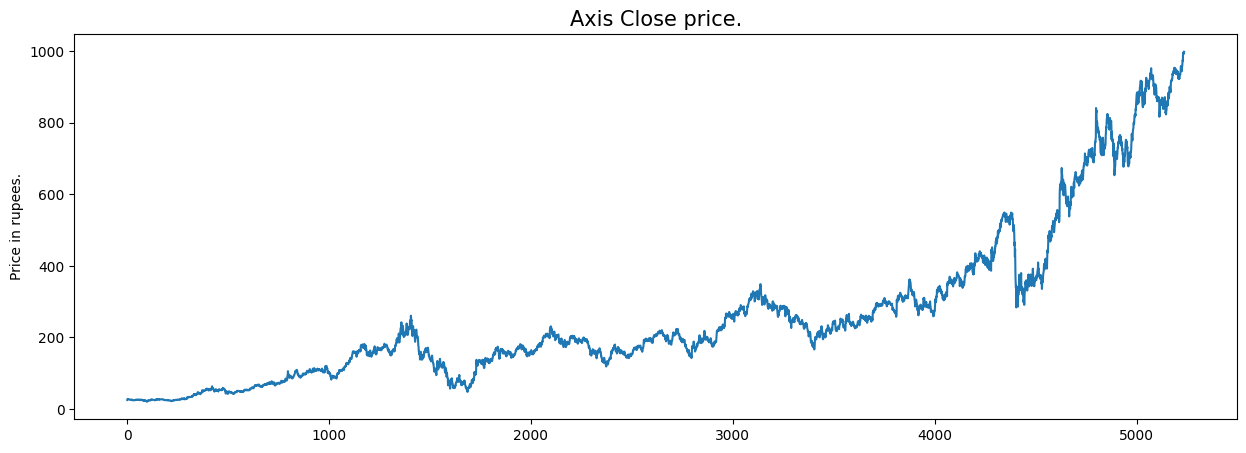

In [3]:
plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.title('Axis Close price.', fontsize=15)
plt.ylabel('Price in rupees.')
plt.show()

In [4]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

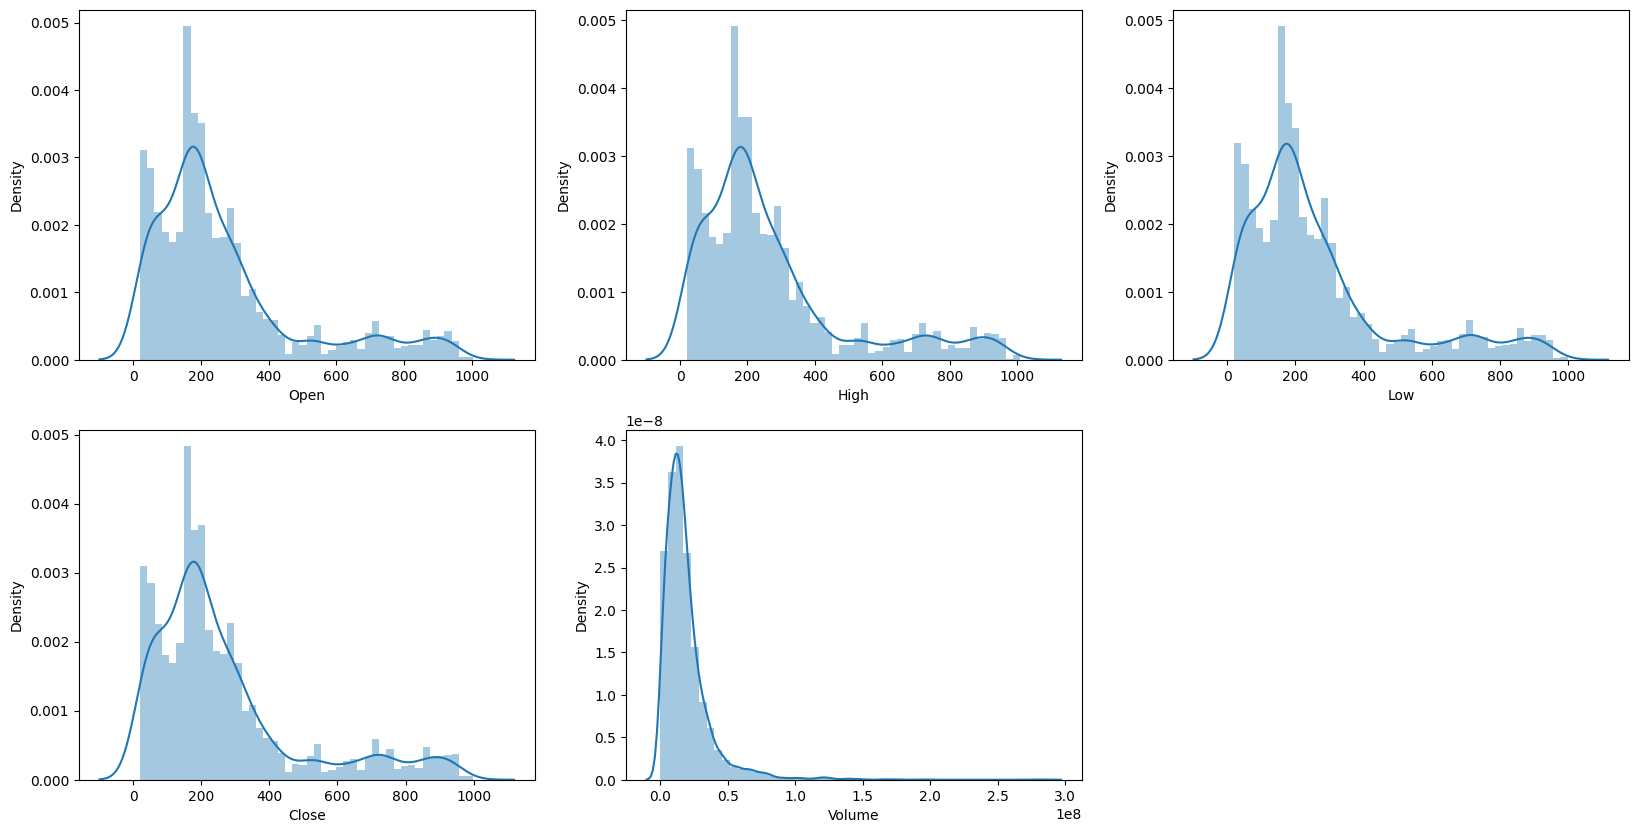

In [5]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.distplot(df[col])
plt.show()

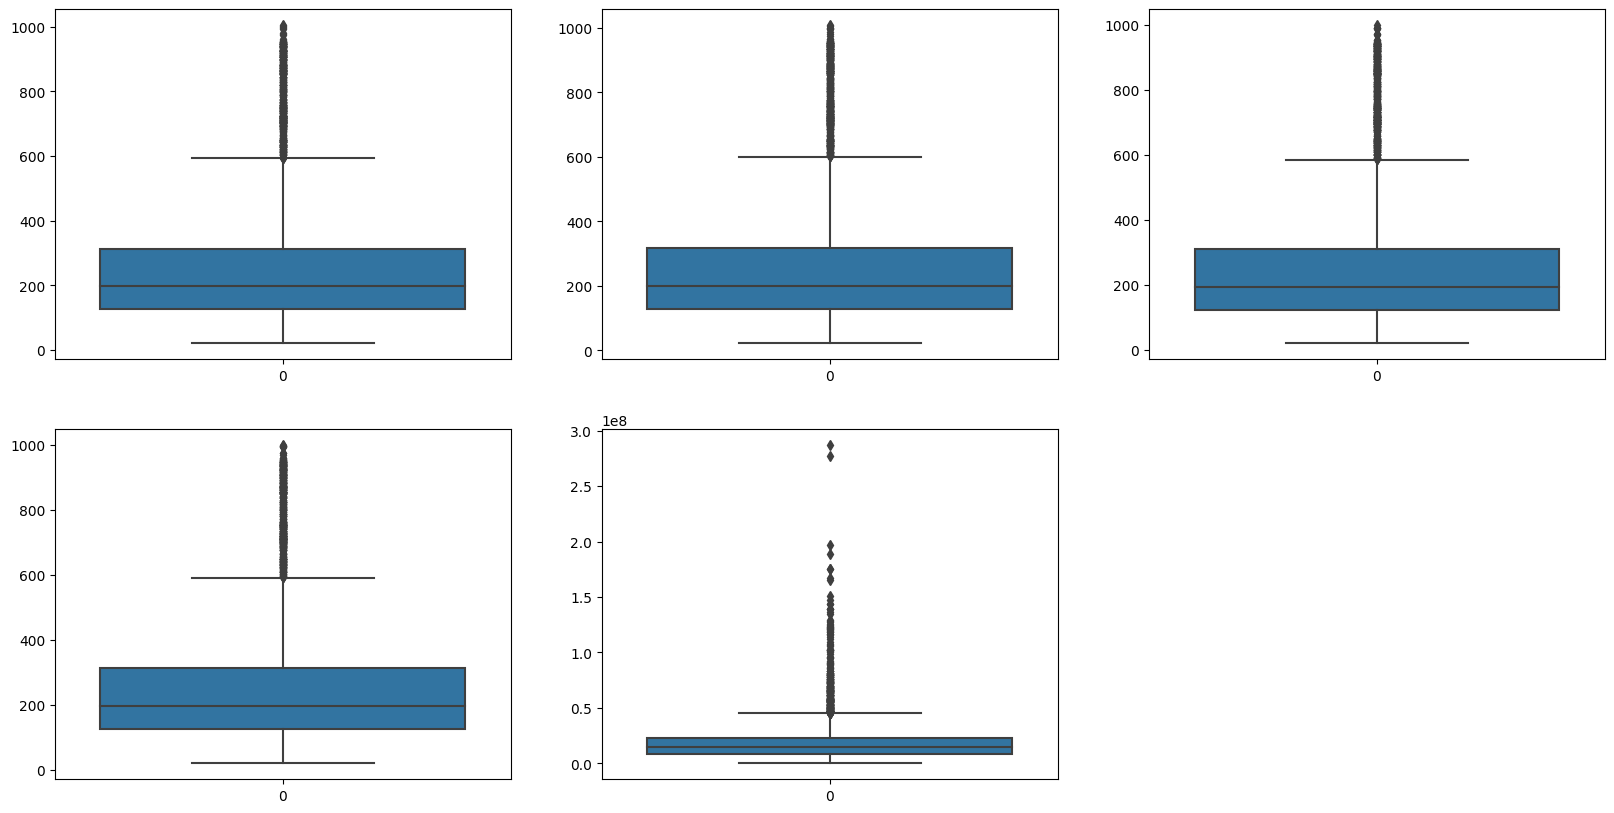

In [6]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.boxplot(df[col])
plt.show()

In [7]:
splitted = df['Date'].str.split('-', expand=True)

df['day'] = splitted[2].astype('int')
df['month'] = splitted[1].astype('int')
df['year'] = splitted[0].astype('int')

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,day,month,year
0,2002-07-01,25.418180,25.818180,24.818180,25.127272,18.183352,2047540,1,7,2002
1,2002-07-02,25.454544,27.636362,25.236362,26.745455,19.354347,5546354,2,7,2002
2,2002-07-03,26.727272,28.181818,26.645454,28.090908,20.327982,5745267,3,7,2002
3,2002-07-04,28.181818,28.799999,27.036364,27.390909,19.821432,3896601,4,7,2002
4,2002-07-05,27.090908,27.863636,26.945454,27.672728,20.025372,3261038,5,7,2002


In [8]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,day,month,year,is_quarter_end
0,2002-07-01,25.418180,25.818180,24.818180,25.127272,18.183352,2047540,1,7,2002,0
1,2002-07-02,25.454544,27.636362,25.236362,26.745455,19.354347,5546354,2,7,2002,0
2,2002-07-03,26.727272,28.181818,26.645454,28.090908,20.327982,5745267,3,7,2002,0
3,2002-07-04,28.181818,28.799999,27.036364,27.390909,19.821432,3896601,4,7,2002,0
4,2002-07-05,27.090908,27.863636,26.945454,27.672728,20.025372,3261038,5,7,2002,0


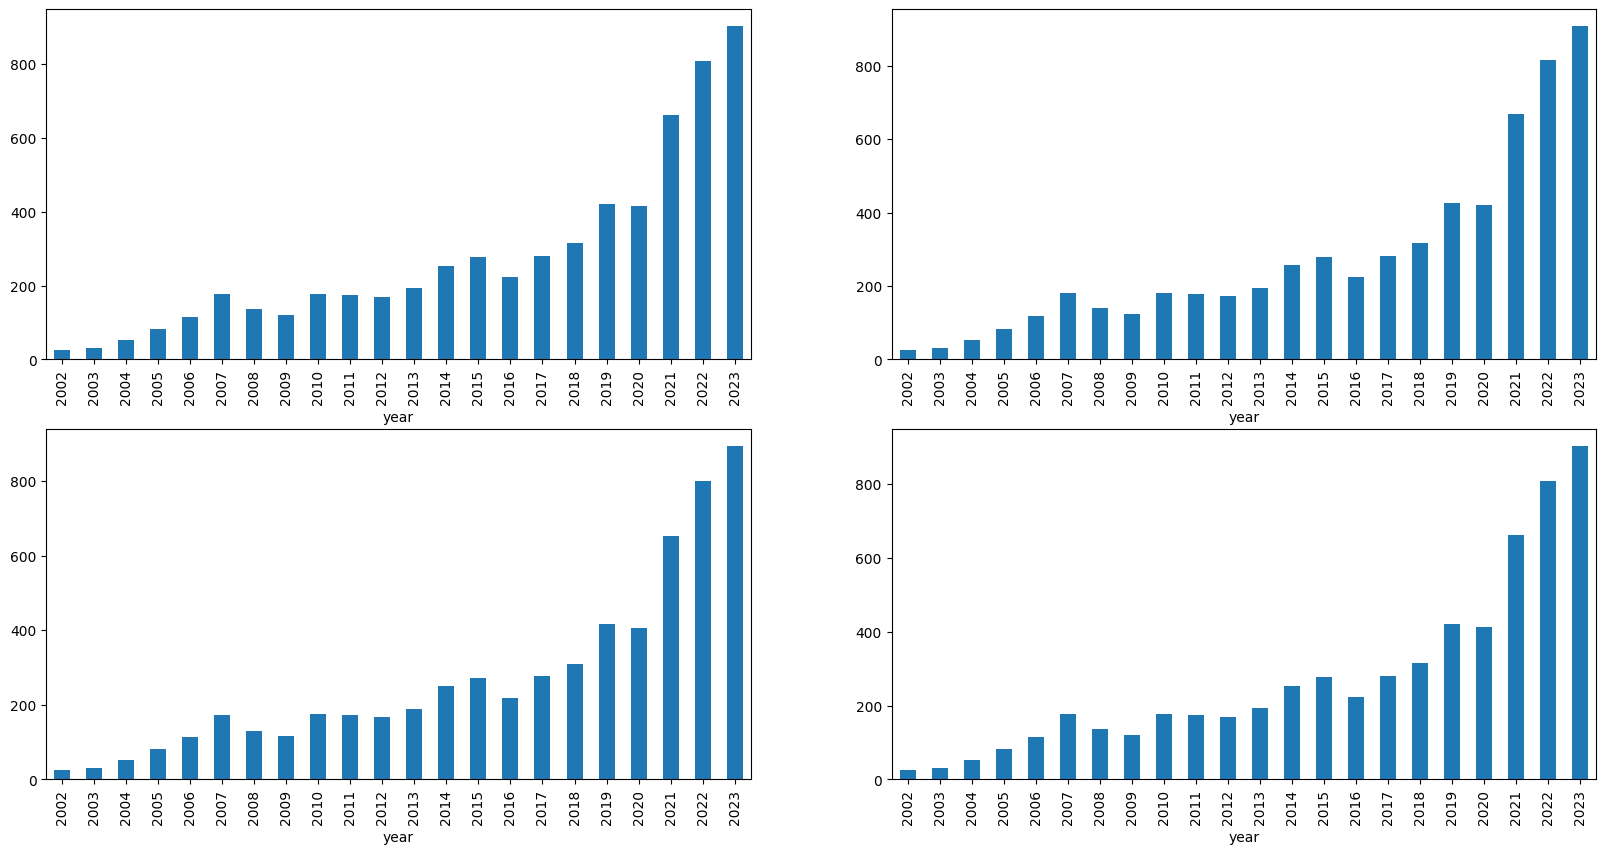

In [9]:
data_grouped = df.groupby('year').mean()
plt.subplots(figsize=(20,10))

for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()

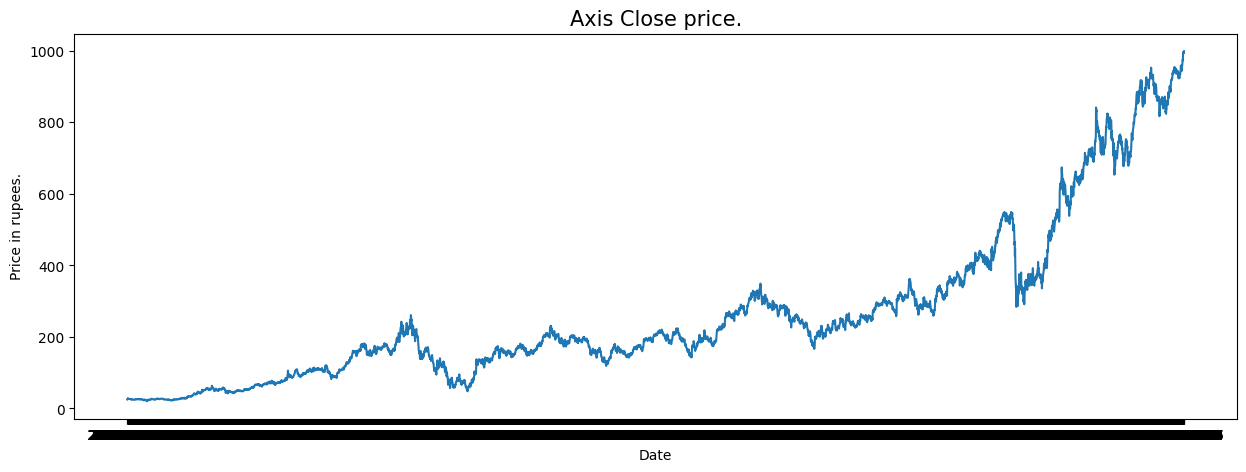

In [10]:
plt.figure(figsize=(15, 5))
plt.plot(df['Date'], df['Close'])
plt.title('Axis Close price.', fontsize=15)
plt.ylabel('Price in rupees.')
plt.xlabel('Date')
plt.show()

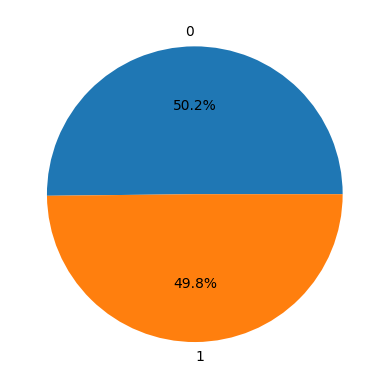

In [11]:
df['open-close'] = df['Open'] - df['Close']
df['low-high'] = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

plt.pie(df['target'].value_counts().values, labels=[0, 1], autopct='%1.1f%%')
plt.show()

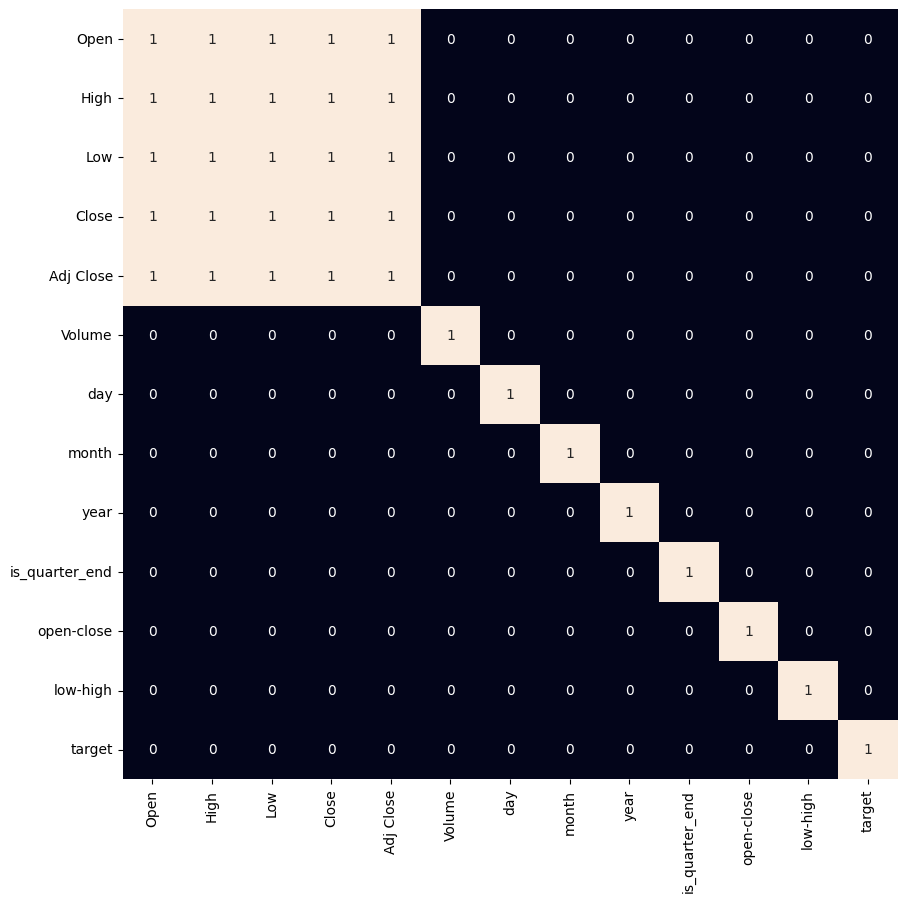

In [12]:
plt.figure(figsize=(10, 10))

sb.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()

In [13]:
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(
    features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)

(4712, 3) (524, 3)


In [14]:
models = [LogisticRegression(), SVC(kernel='poly', probability=True), XGBClassifier()]

for i in range(3):
  models[i].fit(X_train, Y_train)

  print(f'{models[i]} : ')
  print('Training Accuracy : ', metrics.roc_auc_score(Y_train, models[i].predict_proba(X_train)[:,1]))
  print('Validation Accuracy : ', metrics.roc_auc_score(Y_valid, models[i].predict_proba(X_valid)[:,1]))
  print()

LogisticRegression() : 
Training Accuracy :  0.5073119777786066
Validation Accuracy :  0.46418997668997675

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.49322471254459127
Validation Accuracy :  0.5309804778554779

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Trainin

In [34]:
import plotly.express as px
import plotly.graph_objects as go


In [32]:
fig = go.Figure()
plt.figure(figsize=(15, 5))

fig.add_trace(go.Ohlc(x=df.Date,open=df.Open,high=df.High,low=df.Low,close=df.Close,name='Price'), row=1, col=1)

fig.add_trace(go.Scatter(x=df.Date, y=df.Volume, name='Volume'), row=2, col=1)

fig.update(layout_xaxis_rangeslider_visible=False)
plt.show()

Exception: ignored

<Figure size 1500x500 with 0 Axes>